In [17]:
import pandas as pd
# Load the dataset
data = pd.read_csv("payor(1).csv")
# Display the dataset to understand its structure
data.head()

,PatientAge,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,PatientHeight,PatientWeight,KnownAllergies,HealthPremium
0,60,0,1,0,0,175,74,0,28000
1,24,0,0,0,0,178,57,1,15000
2,46,0,1,0,0,184,97,0,35000
3,18,0,0,1,0,150,76,0,15000
4,38,0,0,0,0,160,68,1,23000


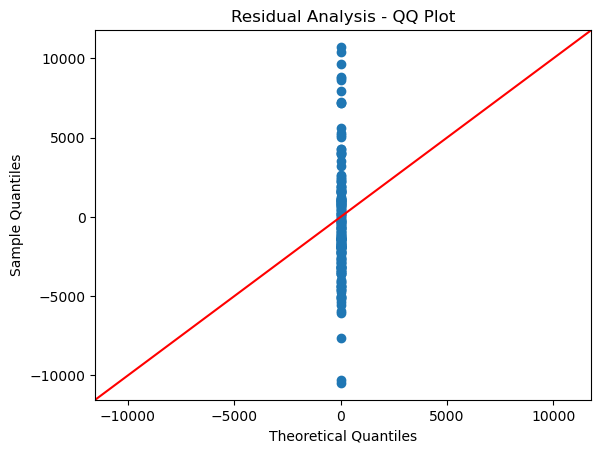

(array([ 3.14433510e+02, -5.78919890e+02, -1.63671604e+01,  7.90092116e+03,
         3.14274720e+03, -1.99716614e+00,  6.68128951e+01, -9.03833967e+00]),
 5718.476521736637,
 0.6942621409734047,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:          HealthPremium   R-squared:                       0.634
 Model:                            OLS   Adj. R-squared:                  0.630
 Method:                 Least Squares   F-statistic:                     161.9
 Date:                Sat, 21 Sep 2024   Prob (F-statistic):          1.59e-157
 Time:                        16:08:22   Log-Likelihood:                -7297.1
 No. Observations:                 756   AIC:                         1.461e+04
 Df Residuals:                     747   BIC:                         1.465e+04
 Df Model:                           8                                         
 Covariance Type:            nonrob

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Separating independent (X) and dependent (y) variables
X = data[['PatientAge', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 
          'PatientHeight', 'PatientWeight', 'KnownAllergies']]
y = data['HealthPremium']

# Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Estimate the model parameters (coefficients and intercept)
coefficients = model.coef_
intercept = model.intercept_

# Check the model fit using R-squared
r_squared = model.score(X_test, y_test)

# Perform residual analysis using statsmodels to get detailed results
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Predictions on the test set
y_pred = model.predict(X_test)

# Residuals
residuals = y_test - y_pred

# Residual plot (QQ plot) for residual analysis
sm.qqplot(residuals, line='45')
plt.title('Residual Analysis - QQ Plot')
plt.show()

# Display results and diagnostics
results_summary = model_sm.summary()

# Display key outputs
coefficients, intercept, r_squared, results_summary
